In [2]:
# 아래의 라이브러리를 사용하므로 미리 임포트해 두기 바랍니다.
import numpy as np
import numpy.random as random
import scipy as sp
import scipy.stats as stats
import pandas as pd
from pandas import Series, DataFrame

import statsmodels.formula.api as smf
import statsmodels.api as sm

# 시각화 라이브러리
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font',family='Malgun Gothic')  # 한글폰트 설정 "맑은 고딕"
import seaborn as sns
%matplotlib inline

# 소수점 3자리까지 표시
%precision 3

'%.3f'

# Q1. 남성과 여성의 주관적 체형인식 기준은 차이가 날까?
분명한 차이가 있을 것이며, 남성보다 여성의 주관적 체형인식 기준이 엄격할 것이다.

## 데이터 불러오기

In [3]:
data0 = pd.read_csv('beauty.csv')
data0

,ID,ID_fam,sex,age,BO1,BO2_1,BO3_01,BO3_02,BO3_03,BO3_14,BO3_05,BO3_04,BO3_12,BO3_07,BO3_09,BO3_10,BO3_11,HE_ht,HE_wt,HE_BMI
0,YA01220302,YA012203,2,56,4.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,151.2,60.6,26.507517
1,YA01220303,YA012203,1,30,4.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,174.1,82.3,27.152029
2,YA01220304,YA012203,2,25,4.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,NaN,166.4,59.0,21.308131
3,YA01236501,YA012365,1,66,3.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,168.7,67.1,23.577207
4,YA01236502,YA012365,2,62,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,157.1,53.9,21.839183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6260,YR38363902,YR383639,2,26,2.0,4.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,NaN,157.2,44.1,17.845697
6261,YR38365901,YR383659,1,31,2.0,3.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,NaN,175.9,64.4,20.813935
6262,YR38368001,YR383680,2,58,4.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,NaN,161.6,67.5,25.847650
6263,YR38368002,YR383680,1,62,4.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,167.5,70.5,25.128091


## 값을 보기 쉽게 변경

In [4]:
# sex가 1인 값을 '남성'으로 변경
data0.loc[data0['sex'] == 1, 'sex'] = '남성'
# sex가 2인 값을 '여성'으로 변경
data0.loc[data0['sex'] == 2, 'sex'] = '여성'

#체중조절노력경험
data0.loc[data0['BO2_1'] == 1, 'BO2_1'] = '감소'
data0.loc[data0['BO2_1'] == 2, 'BO2_1'] = '유지'
data0.loc[data0['BO2_1'] == 3, 'BO2_1'] = '증가'
data0.loc[data0['BO2_1'] == 4, 'BO2_1'] = '노력X'

data0

C:\Users\junhwipython\AppData\Local\Temp\ipykernel_22408\2067143949.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '남성' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data0.loc[data0['sex'] == 1, 'sex'] = '남성'
C:\Users\junhwipython\AppData\Local\Temp\ipykernel_22408\2067143949.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '감소' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data0.loc[data0['BO2_1'] == 1, 'BO2_1'] = '감소'


,ID,ID_fam,sex,age,BO1,BO2_1,BO3_01,BO3_02,BO3_03,BO3_14,BO3_05,BO3_04,BO3_12,BO3_07,BO3_09,BO3_10,BO3_11,HE_ht,HE_wt,HE_BMI
0,YA01220302,YA012203,여성,56,4.0,감소,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,151.2,60.6,26.507517
1,YA01220303,YA012203,남성,30,4.0,감소,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,174.1,82.3,27.152029
2,YA01220304,YA012203,여성,25,4.0,감소,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,NaN,166.4,59.0,21.308131
3,YA01236501,YA012365,남성,66,3.0,유지,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,168.7,67.1,23.577207
4,YA01236502,YA012365,여성,62,3.0,감소,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,157.1,53.9,21.839183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6260,YR38363902,YR383639,여성,26,2.0,노력X,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,NaN,157.2,44.1,17.845697
6261,YR38365901,YR383659,남성,31,2.0,증가,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,NaN,175.9,64.4,20.813935
6262,YR38368001,YR383680,여성,58,4.0,감소,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,NaN,161.6,67.5,25.847650
6263,YR38368002,YR383680,남성,62,4.0,감소,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,167.5,70.5,25.128091


## 데이터 군집화

### 1. BMI 별로 저체중, 정상, 비만 나누기

In [5]:
BMI_cut = [0, 18.5, 25, 100]
BMI_names = ['저체중', '정상', '비만']
data0['obesity'] = pd.cut(data0.HE_BMI, BMI_cut, labels = BMI_names)
data0

,ID,ID_fam,sex,age,BO1,BO2_1,BO3_01,BO3_02,BO3_03,BO3_14,...,BO3_04,BO3_12,BO3_07,BO3_09,BO3_10,BO3_11,HE_ht,HE_wt,HE_BMI,obesity
0,YA01220302,YA012203,여성,56,4.0,감소,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,151.2,60.6,26.507517,비만
1,YA01220303,YA012203,남성,30,4.0,감소,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,NaN,174.1,82.3,27.152029,비만
2,YA01220304,YA012203,여성,25,4.0,감소,1.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,NaN,166.4,59.0,21.308131,정상
3,YA01236501,YA012365,남성,66,3.0,유지,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,168.7,67.1,23.577207,정상
4,YA01236502,YA012365,여성,62,3.0,감소,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,157.1,53.9,21.839183,정상
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6260,YR38363902,YR383639,여성,26,2.0,노력X,8.0,8.0,8.0,8.0,...,8.0,8.0,8.0,8.0,8.0,NaN,157.2,44.1,17.845697,저체중
6261,YR38365901,YR383659,남성,31,2.0,증가,8.0,8.0,8.0,8.0,...,8.0,8.0,8.0,8.0,8.0,NaN,175.9,64.4,20.813935,정상
6262,YR38368001,YR383680,여성,58,4.0,감소,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,NaN,161.6,67.5,25.847650,비만
6263,YR38368002,YR383680,남성,62,4.0,감소,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,NaN,167.5,70.5,25.128091,비만


### 2. 주관적 체형인식 별로 마름, 보통, 비만 나누기

In [6]:
beauty_cut = [1, 2, 3, 5, 9]
beauty_names = ['마름', '정상', '비만', '무응답']
data0['beauty'] = pd.cut(data0.BO1, beauty_cut, labels = beauty_names)
data0

,ID,ID_fam,sex,age,BO1,BO2_1,BO3_01,BO3_02,BO3_03,BO3_14,...,BO3_12,BO3_07,BO3_09,BO3_10,BO3_11,HE_ht,HE_wt,HE_BMI,obesity,beauty
0,YA01220302,YA012203,여성,56,4.0,감소,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,NaN,151.2,60.6,26.507517,비만,비만
1,YA01220303,YA012203,남성,30,4.0,감소,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,NaN,174.1,82.3,27.152029,비만,비만
2,YA01220304,YA012203,여성,25,4.0,감소,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,NaN,166.4,59.0,21.308131,정상,비만
3,YA01236501,YA012365,남성,66,3.0,유지,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,168.7,67.1,23.577207,정상,정상
4,YA01236502,YA012365,여성,62,3.0,감소,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,157.1,53.9,21.839183,정상,정상
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6260,YR38363902,YR383639,여성,26,2.0,노력X,8.0,8.0,8.0,8.0,...,8.0,8.0,8.0,8.0,NaN,157.2,44.1,17.845697,저체중,마름
6261,YR38365901,YR383659,남성,31,2.0,증가,8.0,8.0,8.0,8.0,...,8.0,8.0,8.0,8.0,NaN,175.9,64.4,20.813935,정상,마름
6262,YR38368001,YR383680,여성,58,4.0,감소,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,NaN,161.6,67.5,25.847650,비만,비만
6263,YR38368002,YR383680,남성,62,4.0,감소,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,NaN,167.5,70.5,25.128091,비만,비만


## 남성 데이터

In [ ]:
data_M = data0[data0.sex == 1]
data_M

### 비만도 별 주관적 체형인식

In [ ]:
sns.countplot(data = data_M, x='obesity', hue = 'beauty')

## 여성 데이터

In [ ]:
data_F = data0[data0.sex == 2]
data_F

### 비만도 별 주관적 체형인식

In [ ]:
sns.countplot(data = data_F, x='obesity', hue = 'beauty')

## 여성데이터 기준으로 남성데이터 수 맞추기

In [7]:
female_data = data0[data0['sex']== '여성']
female_count = female_data.groupby('obesity').size()
new_data_list = []

for obesity_group, count in female_count.items():
    female_subset = female_data[female_data['obesity'] == obesity_group]
    male_subset = data0[(data0['sex']== '남성') & (data0['obesity'] == obesity_group)].sample(n=count,replace=True)
    new_data_list.append(female_subset)
    new_data_list.append(male_subset)

new_data = pd.concat(new_data_list)
print(new_data['sex'].value_counts())

sex
여성    3394
남성    3394
Name: count, dtype: int64


C:\Users\junhwipython\AppData\Local\Temp\ipykernel_22408\622364759.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  female_count = female_data.groupby('obesity').size()


In [9]:
new_data_M = new_data[new_data['sex'] == '남성']
new_data_F = new_data[new_data['sex'] == '여성']

## 성별에 따른 주관적 체형인식 정도

C:\Users\junhwipython\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\junhwipython\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='beauty', ylabel='count'>

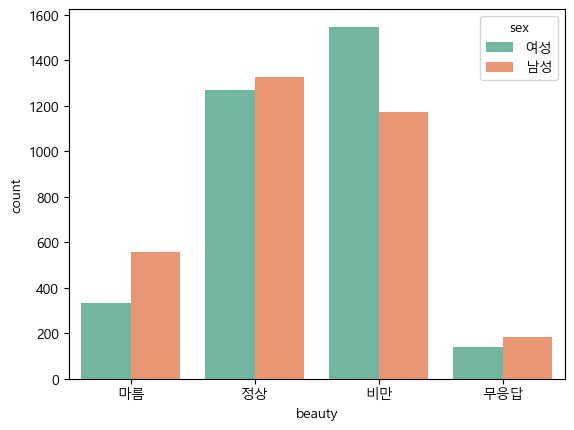

In [10]:
sns.countplot(data = new_data, x='beauty', hue='sex', palette='Set2')

### 자신이 정상이라고 생각한 남성들의 데이터

C:\Users\junhwipython\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\junhwipython\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


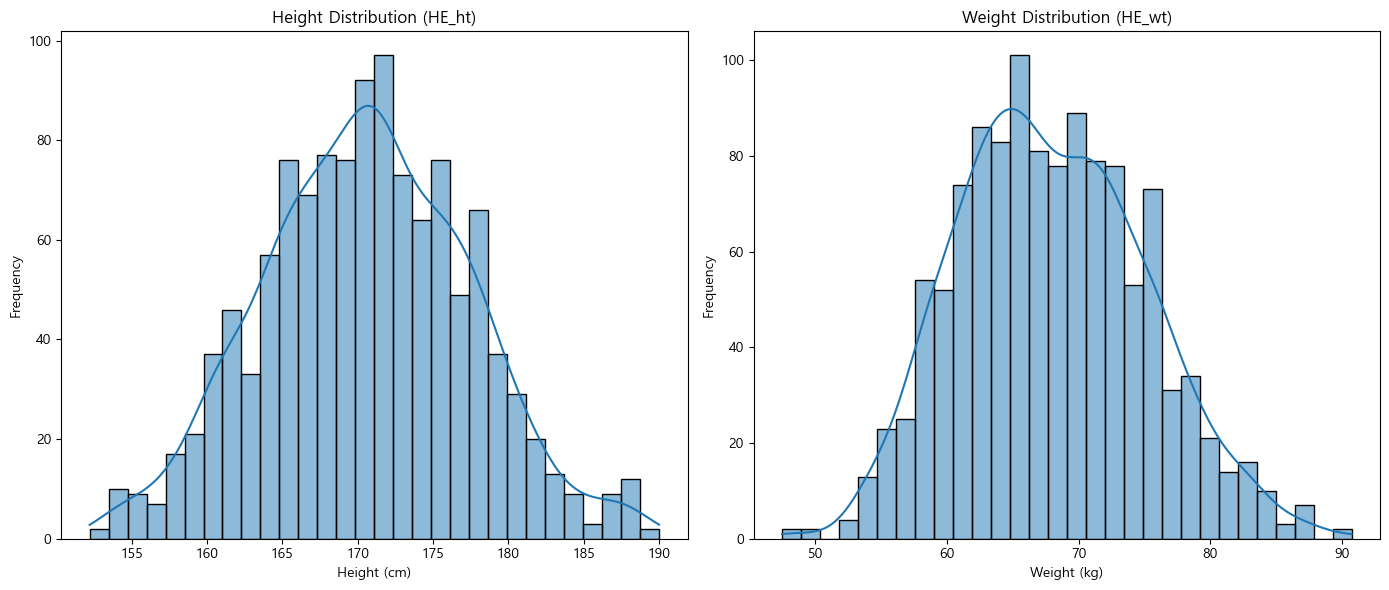

In [9]:
# 필터링
filtered_data_M = new_data_M[(new_data_M['beauty'] == '정상') & (new_data_M['age'] > 17)]

# 히스토그램 및 KDE 플롯
plt.figure(figsize=(14, 6))

# HE_ht 분포
plt.subplot(1, 2, 1)
sns.histplot(filtered_data_M['HE_ht'], kde=True, bins=30)
plt.title('Height Distribution (HE_ht)')
plt.xlabel('Height (cm)')
plt.ylabel('Frequency')

# HE_wt 분포
plt.subplot(1, 2, 2)
sns.histplot(filtered_data_M['HE_wt'], kde=True, bins=30)
plt.title('Weight Distribution (HE_wt)')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')


plt.tight_layout()
plt.show()

C:\Users\junhwipython\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Frequency')

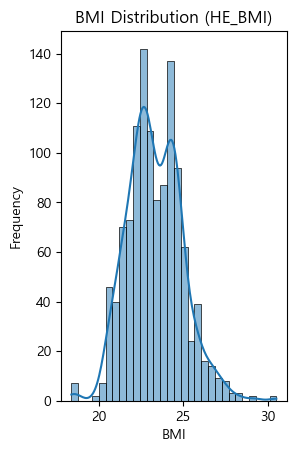

In [10]:
# HE_BMI 분포
plt.subplot(1, 2, 2)
sns.histplot(filtered_data_M['HE_BMI'], kde=True, bins=30)
plt.title('BMI Distribution (HE_BMI)')
plt.xlabel('BMI')
plt.ylabel('Frequency')

In [11]:
M_normal_BMI = new_data_M[(new_data_M['beauty'] == '정상')&(new_data_M['age']>17)]['HE_BMI']
M_normal_BMI_mean = M_normal_BMI.mean()
print(M_normal_BMI_mean)

23.31940135073232


### 자신이 정상이라고 생각한 여성들의 데이터

C:\Users\junhwipython\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\junhwipython\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


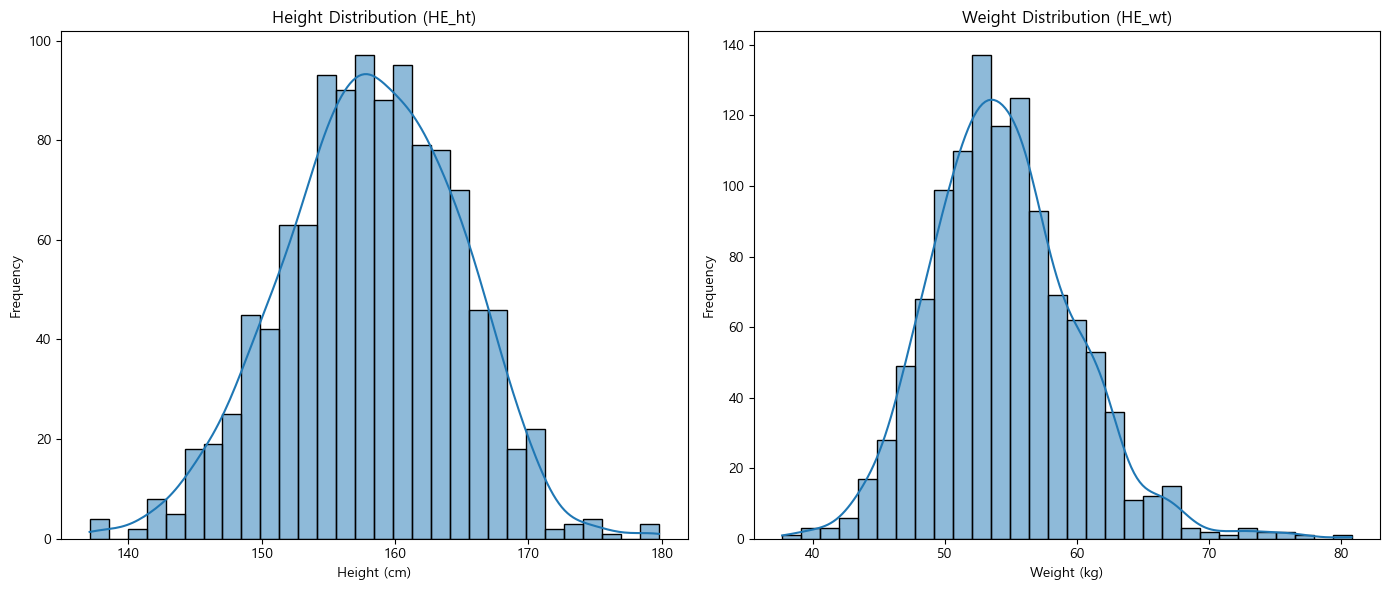

In [12]:
# 필터링
filtered_data_F = new_data_F[(new_data_F['beauty'] == '정상') & (new_data_F['age'] > 17)]

# 히스토그램 및 KDE 플롯
plt.figure(figsize=(14, 6))

# HE_ht 분포
plt.subplot(1, 2, 1)
sns.histplot(filtered_data_F['HE_ht'], kde=True, bins=30)
plt.title('Height Distribution (HE_ht)')
plt.xlabel('Height (cm)')
plt.ylabel('Frequency')

# HE_wt 분포
plt.subplot(1, 2, 2)
sns.histplot(filtered_data_F['HE_wt'], kde=True, bins=30)
plt.title('Weight Distribution (HE_wt)')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')


plt.tight_layout()
plt.show()

C:\Users\junhwipython\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Frequency')

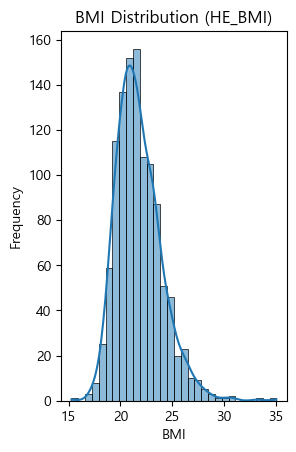

In [13]:
# HE_BMI 분포
plt.subplot(1, 2, 2)
sns.histplot(filtered_data_F['HE_BMI'], kde=True, bins=30)
plt.title('BMI Distribution (HE_BMI)')
plt.xlabel('BMI')
plt.ylabel('Frequency')

In [14]:
F_normal_BMI = new_data_F[(new_data_F['beauty'] == '정상')&(new_data_F['age']>17)]['HE_BMI']
F_normal_BMI_mean = F_normal_BMI.mean()
print(F_normal_BMI_mean)

21.784909853684677


### 남녀 간 주관적 체형인식 정도에 따른 체중조절 노력 경험
BO2_1 체중조절 노력 경험
(1.0 : 체중 감소를 위해 노력
2.0 : 체중 유지를 위해 노력
3.0 : 체중 증가를 위해 노력
4.0 : 노력해본 적 없음
8.0/9.0 : 무응답 및 해당없음)

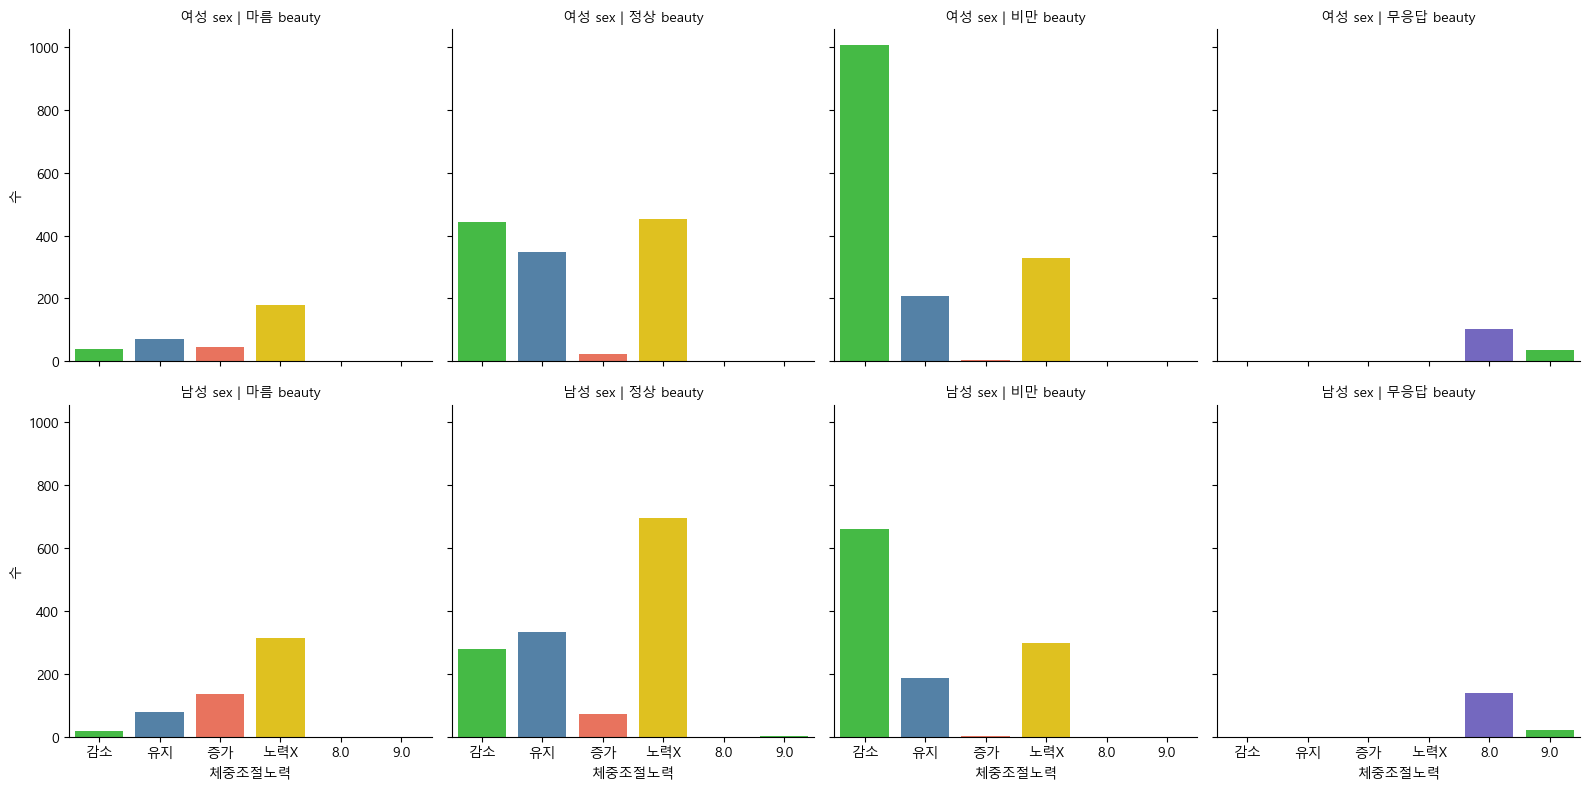

In [15]:
custom_palette = ['#32CD32', '#4682B4', '#FF6347', '#FFD700', '#6A5ACD']
order = ['감소', '유지', '증가', '노력X', 8.0, 9.0]

g = sns.catplot(data=new_data, x='BO2_1', kind='count', col='beauty', row='sex', 
                height=4, aspect=1, palette=custom_palette, order=order)

g.set_axis_labels("체중조절노력", "수")
g.set_titles(col_template="{col_name} beauty", row_template="{row_name} sex")

plt.tight_layout()

plt.show()

#### 이 그래프가 더 나은 듯

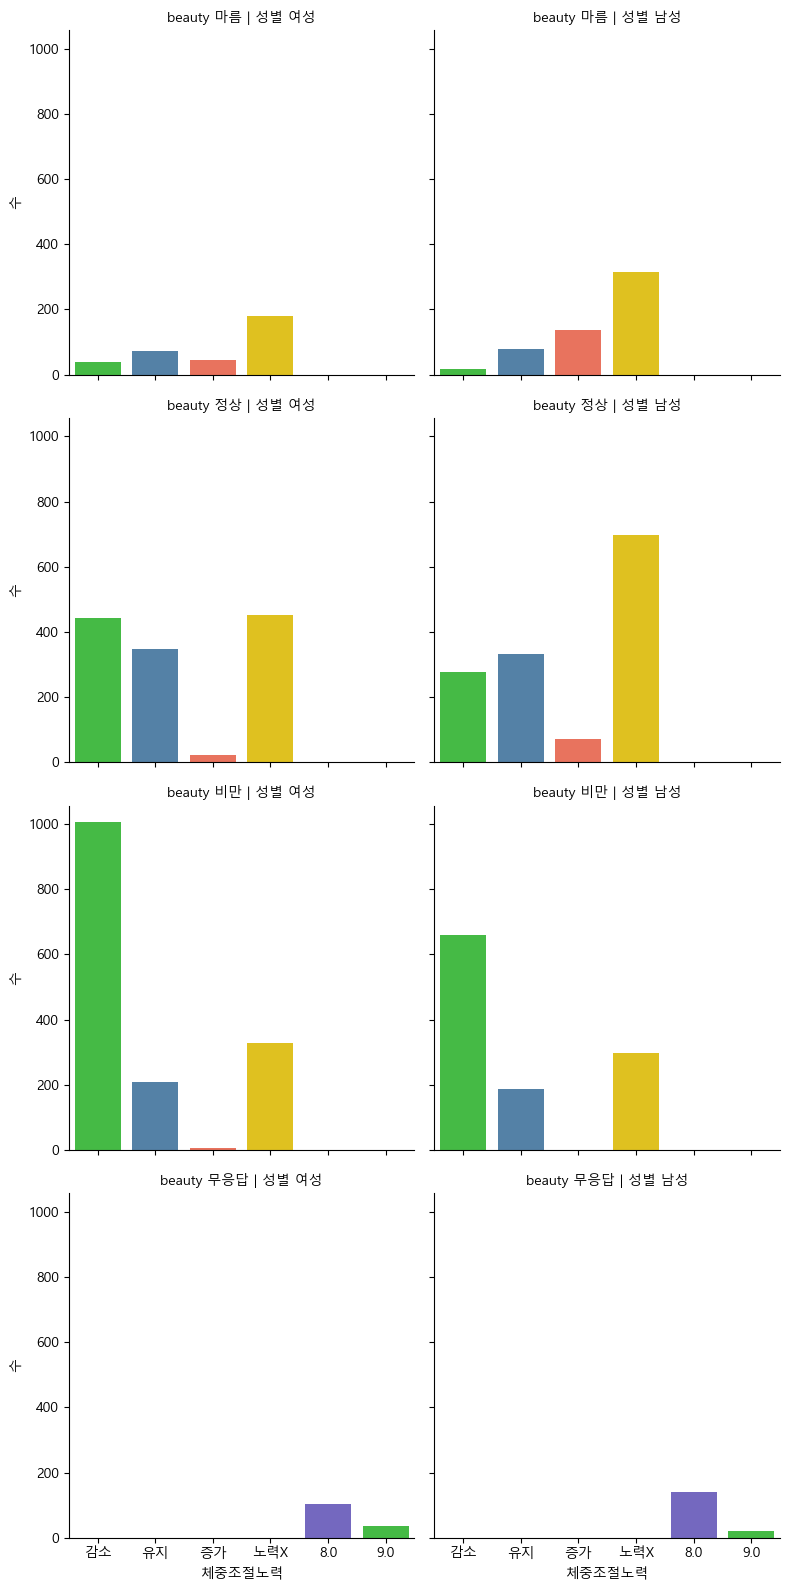

In [41]:
custom_palette = ['#32CD32', '#4682B4', '#FF6347', '#FFD700', '#6A5ACD']
order = ['감소', '유지', '증가', '노력X', 8.0, 9.0]

g = sns.catplot(data=new_data, x='BO2_1', kind='count', col='sex', row='beauty', 
                height=4, aspect=1, palette=custom_palette, order=order)

g.set_axis_labels("체중조절노력", "수")
g.set_titles(col_template="성별 {col_name}", row_template="beauty {row_name}")

plt.tight_layout()

plt.show()

## 남성 데이터 분석

### 주관적 체형인식 정도에 따른 체중조절 노력 경험
BO2_1 : 체중조절 노력 경험
(1.0 : 체중 감소를 위해 노력
2.0 : 체중 유지를 위해 노력
3.0 : 체중 증가를 위해 노력
4.0 : 노력해본 적 없음
8.0/9.0 : 무응답 및 해당없음)

In [42]:
# 'BO2_1' 열의 데이터 유형을 문자열로 변환
new_data_M['BO2_1'] = new_data_M['BO2_1'].astype(str)

cross_tab = pd.crosstab(new_data_M.beauty, new_data_M.BO2_1)

# 순서대로 정렬된 열 이름 리스트를 생성
desired_order = ['감소', '유지', '증가', '노력X', '8.0', '9.0']

# 원하는 순서로 정렬된 크로스탭을 생성
cross_tab = cross_tab[desired_order]

# 변경된 크로스탭 출력
cross_tab

C:\Users\junhwipython\AppData\Local\Temp\ipykernel_35008\1659283599.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data_M['BO2_1'] = new_data_M['BO2_1'].astype(str)


BO2_1,감소,유지,증가,노력X,8.0,9.0
beauty,,,,,,
마름,17,80,136,314,0,0
정상,278,333,71,696,0,2
비만,660,188,1,299,0,0
무응답,0,0,0,0,140,20


In [12]:
cross_tab = pd.crosstab(new_data_M.BMI, new_data_M.BO2_1)
cross_tab

AttributeError: 'DataFrame' object has no attribute 'BMI'

In [18]:
M000_M111_1 = new_data_M[(new_data_M['beauty'] == '비만')&(new_data_M['BO2_1']=='감소')]
print('남자 중 자신의 체형이 비만이라고 답한 사람', len(new_data_M[new_data_M['beauty'] == '비만']), '명 중에서 1년간 체중을 감소시키려고 노력한 사람의 수', len(M000_M111_1), '명')

남자 중 자신의 체형이 비만이라고 답한 사람 1148 명 중에서 1년간 체중을 감소시키려고 노력한 사람의 수 660 명


In [15]:
new_data['BO2_1'] = new_data['BO2_1'].astype(str)
cross_tab = pd.crosstab(new_data.obesity, new_data.BO2_1)
desired_order = ['감소', '유지', '증가', '노력X', '8.0', '9.0']
cross_tab = cross_tab[desired_order]
cross_tab

BO2_1,감소,유지,증가,노력X,8.0,9.0
obesity,,,,,,
저체중,44,68,162,330,253,0
정상,1272,940,231,1576,18,41
비만,1101,232,7,488,0,14


C:\Users\junhwipython\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='BO2_1', ylabel='count'>

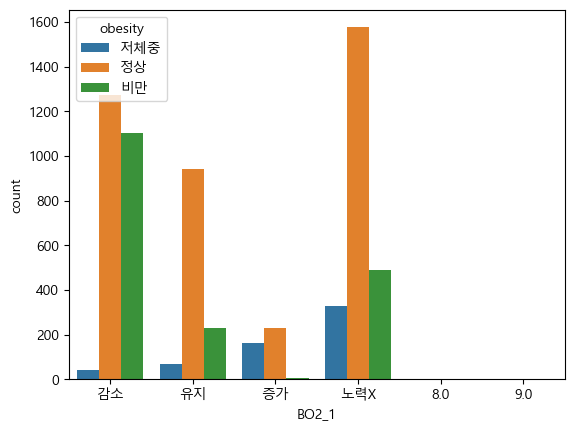

In [25]:
sns.countplot(data=new_data, x='BO2_1', hue='obesity')

### 비만도 별 주관적 체형인식 -> 주관적 체형인식 별 비만도

C:\Users\junhwipython\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\junhwipython\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='beauty', ylabel='count'>

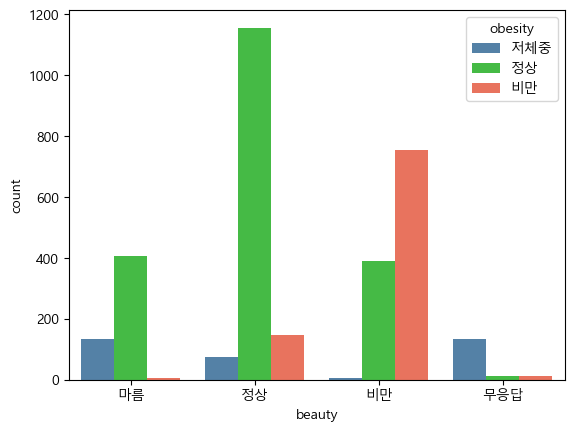

In [45]:
custom_palette = ['#4682B4', '#32CD32', '#FF6347']
sns.countplot(data = new_data_M , x='beauty', hue = 'obesity', palette=custom_palette)

In [50]:
pd.crosstab(new_data_M.beauty, new_data_M.obesity)

obesity,비만,저체중,정상
beauty,,,
마름,5,135,407
정상,148,76,1156
비만,753,5,390
무응답,13,134,13


C:\Users\junhwipython\AppData\Local\Temp\ipykernel_35008\2204691002.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data_M['obesity'] = new_data_M['obesity'].astype(str)


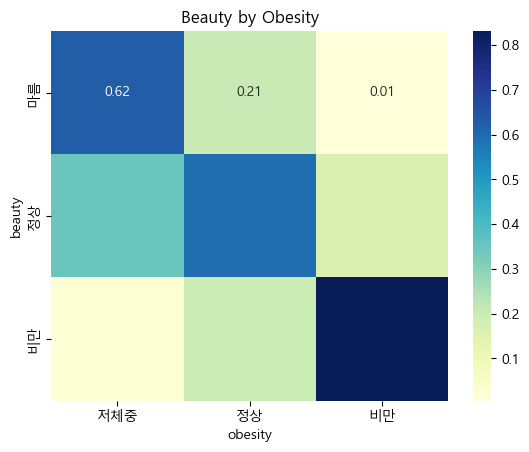

In [48]:
# 'obesity' 열을 문자열로 변환
new_data_M['obesity'] = new_data_M['obesity'].astype(str)

# beauty 열에서 '무응답'를 제외한 데이터만 필터링
new_data_M_filtered = new_data_M[new_data_M['beauty'] != '무응답']
                            (new_data['BO2_1'] != 1)&(new_data['BO2_1'] != 4)
# 크로스탭 생성
cross_tab = pd.crosstab(new_data_M_filtered.beauty, new_data_M_filtered.obesity, normalize='columns')

# 'obesity' 열의 순서를 지정
order = ['저체중', '정상', '비만']  # 사용자가 원하는 순서로 지정

# 'obesity' 열의 순서를 지정된 순서로 재정렬
cross_tab = cross_tab.reindex(columns=order)

# 히트맵 그리기
sns.heatmap(cross_tab, annot=True, cmap='YlGnBu', fmt=".2f")  # 소수점 둘째 자리까지 표시

# 그래프 제목 설정
plt.title('Beauty by Obesity')

# 그래프 보여주기
plt.show()

In [30]:
M_0 = new_data_M[new_data_M['obesity'] == '정상']
M_1 = new_data_M[(new_data_M['obesity'] == '정상')&(new_data_M['beauty'] == '정상')]
print('남자 중 BMI가 정상인 사람', len(M_0), '명 중', '자신의 체형이 정상이라고 답한 사람의 수 = ', len(M_1), '명')

남자 중 BMI가 정상인 사람 2042 명 중 자신의 체형이 정상이라고 답한 사람의 수 =  1156 명


In [31]:
M0 = new_data_M[new_data_M['obesity'] == '정상']
M1 = new_data_M[(new_data_M['obesity'] == '정상')&(new_data_M['beauty'] == '비만')]
print('남자 중 BMI가 정상인 사람', len(M0), '명 중', '자신의 체형이 비만이라고 답한 사람의 수 = ', len(M1), '명')

남자 중 BMI가 정상인 사람 2042 명 중 자신의 체형이 비만이라고 답한 사람의 수 =  390 명


In [32]:
M0_M1_1 = new_data_M[(new_data_M['obesity'] == '정상')&(new_data_M['beauty'] == '비만')&(new_data_M['BO2_1']=='감소')]
print('남자 중 BMI가 정상인데도 자신의 체형이 비만이라고 답한 사람', len(M1), '명 중에서 1년간 체중을 감소시키려고 노력한 사람의 수', len(M0_M1_1), '명')

남자 중 BMI가 정상인데도 자신의 체형이 비만이라고 답한 사람 390 명 중에서 1년간 체중을 감소시키려고 노력한 사람의 수 172 명


In [33]:
M00 = new_data_M[new_data_M['obesity'] == '저체중']
M11 = new_data_M[(new_data_M['obesity'] == '저체중')&(new_data_M['beauty'] == '정상')]
print('남자 중 BMI가 저체중인 사람', len(M00), '명 중', '자신의 체형이 정상이라고 답한 사람의 수 = ', len(M11), '명')

남자 중 BMI가 저체중인 사람 431 명 중 자신의 체형이 정상이라고 답한 사람의 수 =  76 명


In [34]:
M000 = new_data_M[new_data_M['obesity'] == '비만']
M111 = new_data_M[(new_data_M['obesity'] == '비만')&(new_data_M['beauty'] == '비만')]
print('남자 중 BMI가 비만인 사람', len(M000), '명 중', '자신의 체형이 비만이라고 답한 사람의 수 = ', len(M111), '명')

남자 중 BMI가 비만인 사람 921 명 중 자신의 체형이 비만이라고 답한 사람의 수 =  753 명


## 여성 데이터 분석

### 주관적 체형인식 정도에 따른 체중조절 노력 경험
BO2_1 :체중조절 노력 경험
 (1.0 : 체중 감소를 위해 노력 2.0 : 체중 유지를 위해 노력 3.0 : 체중 증가를 위해 노력 4.0 : 노력해본 적 없음 8.0/9.0 : 무응답 및 해당없음)

In [43]:
# 'BO2_1' 열의 데이터 유형을 문자열로 변환
new_data_F['BO2_1'] = new_data_F['BO2_1'].astype(str)

cross_tab = pd.crosstab(new_data_F.beauty, new_data_F.BO2_1)

# 순서대로 정렬된 열 이름 리스트를 생성
desired_order = ['감소', '유지', '증가', '노력X', '8.0', '9.0']

# 원하는 순서로 정렬된 크로스탭을 생성
cross_tab = cross_tab[desired_order]

# 변경된 크로스탭 출력
cross_tab

C:\Users\junhwipython\AppData\Local\Temp\ipykernel_35008\3099484218.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data_F['BO2_1'] = new_data_F['BO2_1'].astype(str)


BO2_1,감소,유지,증가,노력X,8.0,9.0
beauty,,,,,,
마름,38,72,45,179,0,0
정상,443,348,24,452,0,0
비만,1006,208,5,328,0,0
무응답,0,0,0,0,103,37


In [26]:
F000_F111_1 = new_data_F[(new_data_F['beauty'] == '비만')&(new_data_F['BO2_1']=='감소')]
print('여자 중 자신의 체형이 비만이라고 답한 사람', len(new_data_F[new_data_F['beauty'] == '비만']), '명 중에서 1년간 체중을 감소시키려고 노력한 사람의 수', len(F000_F111_1), '명')

여자 중 자신의 체형이 비만이라고 답한 사람 1547 명 중에서 1년간 체중을 감소시키려고 노력한 사람의 수 1006 명


### 비만도 별 주관적 체형인식

C:\Users\junhwipython\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\junhwipython\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='beauty', ylabel='count'>

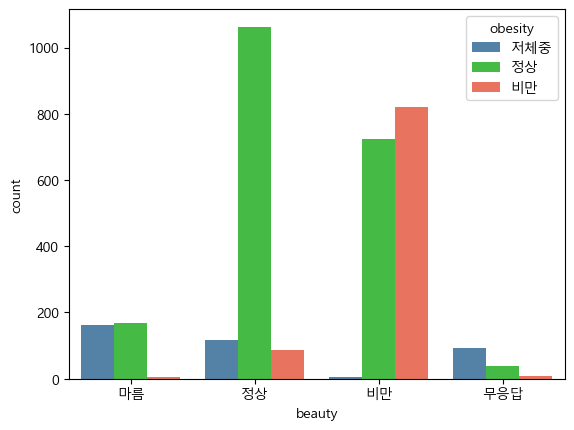

In [46]:
custom_palette = ['#4682B4', '#32CD32', '#FF6347']
sns.countplot(data = new_data_F , x='beauty', hue = 'obesity', palette=custom_palette)

In [28]:
pd.crosstab(new_data_F.beauty, new_data_F.obesity)

obesity,저체중,정상,비만
beauty,,,
마름,161,167,6
정상,116,1063,88
비만,4,724,819
무응답,93,39,8


C:\Users\junhwipython\AppData\Local\Temp\ipykernel_35008\2464311565.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data_F['obesity'] = new_data_F['obesity'].astype(str)


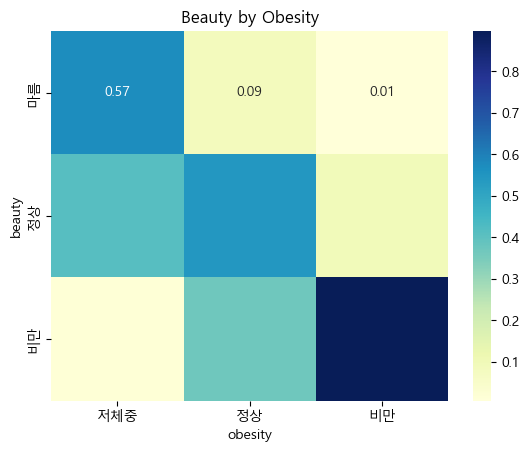

In [47]:
# 'obesity' 열을 문자열로 변환
new_data_F['obesity'] = new_data_F['obesity'].astype(str)

# beauty 열에서 '무응답'를 제외한 데이터만 필터링
new_data_F_filtered = new_data_F[new_data_F['beauty'] != '무응답']

# 크로스탭 생성
cross_tab = pd.crosstab(new_data_F_filtered.beauty, new_data_F_filtered.obesity, normalize='columns')

# 'obesity' 열의 순서를 지정
order = ['저체중', '정상', '비만']  # 사용자가 원하는 순서로 지정

# 'obesity' 열의 순서를 지정된 순서로 재정렬
cross_tab = cross_tab.reindex(columns=order)

# 히트맵 그리기
sns.heatmap(cross_tab, annot=True, cmap='YlGnBu', fmt=".2f")  # 소수점 둘째 자리까지 표시

# 그래프 제목 설정
plt.title('Beauty by Obesity')

# 그래프 보여주기
plt.show()

In [35]:
F_0 = new_data_F[new_data_F['obesity'] == '정상']
F_1 = new_data_F[(new_data_F['obesity'] == '정상')&(new_data_F['beauty'] == '정상')]
print('여자 중 BMI가 정상인 사람', len(F_0), '명 중', '자신의 체형이 정상이라고 답한 사람의 수 = ', len(F_1), '명')

여자 중 BMI가 정상인 사람 2042 명 중 자신의 체형이 정상이라고 답한 사람의 수 =  1063 명


In [36]:
F0 = new_data_F[new_data_F['obesity'] == '정상']
F1 = new_data_F[(new_data_F['obesity'] == '정상')&(new_data_F['beauty'] == '비만')]
print('여자 중 BMI가 정상인 사람', len(F0), '명 중', '자신의 체형이 비만이라고 답한 사람의 수 = ', len(F1), '명')

여자 중 BMI가 정상인 사람 2042 명 중 자신의 체형이 비만이라고 답한 사람의 수 =  724 명


In [37]:
F0_F1_1 = new_data_F[(new_data_F['obesity'] == '정상')&(new_data_F['beauty'] == '비만')&(new_data_F['BO2_1']=='감소')]
print('여자 중 BMI가 정상인데도 자신의 체형이 비만이라고 답한 사람', len(F1), '명 중에서 1년간 체중을 감소시키려고 노력한 사람의 수', len(F0_F1_1), '명')

여자 중 BMI가 정상인데도 자신의 체형이 비만이라고 답한 사람 724 명 중에서 1년간 체중을 감소시키려고 노력한 사람의 수 439 명


In [38]:
F00 = new_data_F[new_data_F['obesity'] == '저체중']
F11 = new_data_F[(new_data_F['obesity'] == '저체중')&(new_data_F['beauty'] == '정상')]
print('여자 중 BMI가 저체중인 사람', len(F00), '명 중', '자신의 체형이 정상이라고 답한 사람의 수 = ', len(F11), '명')

여자 중 BMI가 저체중인 사람 431 명 중 자신의 체형이 정상이라고 답한 사람의 수 =  116 명


In [39]:
F000 = new_data_F[new_data_F['obesity'] == '비만']
F111 = new_data_F[(new_data_F['obesity'] == '비만')&(new_data_F['beauty'] == '비만')]
print('여자 중 BMI가 비만인 사람', len(F000), '명 중', '자신의 체형이 비만이라고 답한 사람의 수 = ', len(F111), '명')

여자 중 BMI가 비만인 사람 921 명 중 자신의 체형이 비만이라고 답한 사람의 수 =  819 명
